In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.shape

(14999, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


0    11428
1     3571
Name: left, dtype: int64


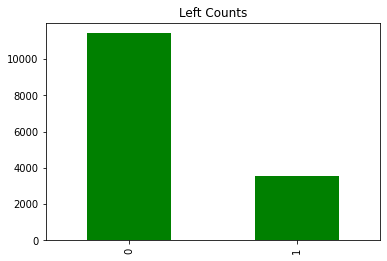

In [13]:
left_counts=df['left'].value_counts()
print(left_counts)
left_counts.plot(kind='bar', color='green', title='Left Counts')
plt.show()

<AxesSubplot: xlabel='salary'>

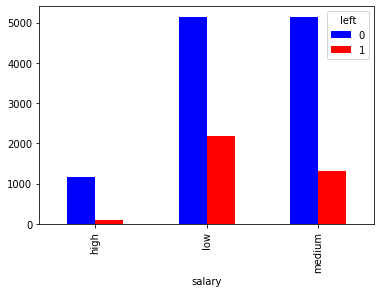

In [14]:
pd.crosstab(df.salary,df.left).plot(kind='bar',color=['blue','red'])

<AxesSubplot: xlabel='number_project'>

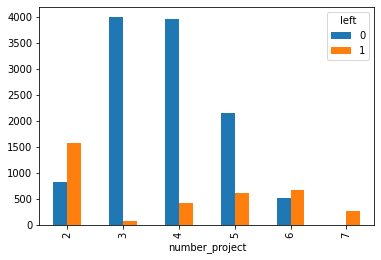

In [15]:
pd.crosstab(df.number_project,df.left).plot(kind='bar')

<AxesSubplot: xlabel='time_spend_company'>

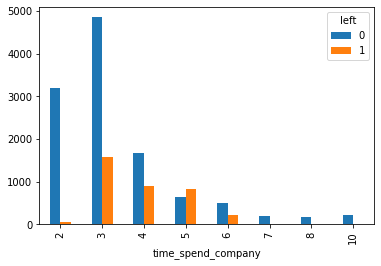

In [16]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

In [17]:
salary_dummies=pd.get_dummies(df.salary,prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [18]:
salary_dummies.drop('salary_high',axis='columns',inplace=True)
salary_dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [19]:
subdf=df[['satisfaction_level','last_evaluation','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,salary
0,0.38,0.53,157,0,low
1,0.80,0.86,262,0,medium
2,0.11,0.88,272,0,medium
3,0.72,0.87,223,0,low
4,0.37,0.52,159,0,low


In [20]:
new=pd.concat([subdf,salary_dummies],axis='columns')
new.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,salary,salary_low,salary_medium
0,0.38,0.53,157,0,low,1,0
1,0.80,0.86,262,0,medium,0,1
2,0.11,0.88,272,0,medium,0,1
3,0.72,0.87,223,0,low,1,0
4,0.37,0.52,159,0,low,1,0


In [21]:
new.drop('salary',axis='columns',inplace=True)
new.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,157,0,1,0
1,0.80,0.86,262,0,0,1
2,0.11,0.88,272,0,0,1
3,0.72,0.87,223,0,1,0
4,0.37,0.52,159,0,1,0


In [22]:
X=new
X.head()

,satisfaction_level,last_evaluation,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,0.53,157,0,1,0
1,0.80,0.86,262,0,0,1
2,0.11,0.88,272,0,0,1
3,0.72,0.87,223,0,1,0
4,0.37,0.52,159,0,1,0


In [23]:
y=df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [26]:
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
model.score(X_test,y_test)

0.7777777777777778